# 中國時報近期30篇新聞分析

In [2]:
#encoding=utf-8
#import package we need to use.
import requests
from bs4 import BeautifulSoup

In [3]:
#從Google瀏覽器的檢查可以知道取得html要用get方法以及需要的網址
url = 'http://www.chinatimes.com/politic/total/'
res = requests.get(url)
#確定可以讀取到網頁
res.status_code

200

In [4]:
#把政治文章列表頁中每一篇文章的網址擷取出來
soup = BeautifulSoup(res.text, 'html.parser')
url_list = []
for s in soup.find(class_='news-list').find_all(class_="clear-fix"):
    url_list.append(s.find('a')['href'])

In [5]:
#發現最後一筆會是下一頁的url
soup.find(class_='news-list').find_all(class_="clear-fix")[-1].find('a')['href']

'/politic/total/?page=2'

In [6]:
#嘗試把整篇文章整理出來(去除<p>等Tag標籤)
bs_temp = BeautifulSoup(requests.get(url_list[0]).text, 'html.parser')
article = ''
for line in bs_temp.find_all('article')[0].find_all('p'):
    article = line.text+article
print(article)

(中時電子報)網友酸說：「總統很温暖。中間隔著拒馬，內心卻接近我。」、「嗯，好接近。蛇籠、拒馬、維安人牆、還有計畫加高的府邸圍牆...真的好接近，接近到很確定人民翻不到她的桌、憤怒的鞋砸不到她、人民的聲音她可以充耳不聞。」、「莫非是魔神仔。」、「真的都不知道妳在接近，尤其拒馬那麼多、那麼高！」蔡英文說，擔任民進黨主席之前，比較不會主動跟人家聊天，但做了黨主席之後，就開始要聊天，展現領導人對他人的真誠關懷。而當了總統之後，很多事阻絕了她跟民眾之間直接的接觸，因此她才覺得應該要在花蓮震後跟他們面對面，聽聽花蓮人怎麼說，並告訴他們不要擔心。蔡總統無奈說，她知道人民很想要知道總統在想什麼，幕僚就會替她寫成稿子，讓她在群眾面前唸出來，文字優美、內容豐富，但總統表情嚴肅，民眾印象不深刻，總統好像沒個性。蔡總統接受年代新聞台專訪時說，行政團隊應該站在第一線去表現、擔起責任，那她可以站在後面，看哪些地方需要補強，哪些地方需要她的協助；而不是總統老是擋在前面，行政團隊躲在總統後面。因此久而久之，就有人會覺得總統好像不見了。蔡英文總統執政以來，遇到爭議問題，都只派發言人出面，更因臉書治國、推特外交，而被外界封為「神隱少女」。她今天接受電視訪問時對此終於說出原因，「其實我是接近的，只是你不知道我在接近你而已。」這樣的說法不禁讓網友臉上出現三條線。


In [7]:
#把每一篇整理好的文章存在article_list裡
article_list = []
for i in range(len(url_list)-1):
    bs_temp = BeautifulSoup(requests.get(url_list[i]).text, 'html.parser')
    article = ''
    for line in bs_temp.find_all('article')[0].find_all('p'):
        article = line.text+article
    article_list.append(article)

In [8]:
print('We have '+str(len(article_list))+' articles.')

We have 30 articles.


In [9]:
#嘗試把文章以逗號分句
article_list[0].split('，')

['(中時電子報)網友酸說：「總統很温暖。中間隔著拒馬',
 '內心卻接近我。」、「嗯',
 '好接近。蛇籠、拒馬、維安人牆、還有計畫加高的府邸圍牆...真的好接近',
 '接近到很確定人民翻不到她的桌、憤怒的鞋砸不到她、人民的聲音她可以充耳不聞。」、「莫非是魔神仔。」、「真的都不知道妳在接近',
 '尤其拒馬那麼多、那麼高！」蔡英文說',
 '擔任民進黨主席之前',
 '比較不會主動跟人家聊天',
 '但做了黨主席之後',
 '就開始要聊天',
 '展現領導人對他人的真誠關懷。而當了總統之後',
 '很多事阻絕了她跟民眾之間直接的接觸',
 '因此她才覺得應該要在花蓮震後跟他們面對面',
 '聽聽花蓮人怎麼說',
 '並告訴他們不要擔心。蔡總統無奈說',
 '她知道人民很想要知道總統在想什麼',
 '幕僚就會替她寫成稿子',
 '讓她在群眾面前唸出來',
 '文字優美、內容豐富',
 '但總統表情嚴肅',
 '民眾印象不深刻',
 '總統好像沒個性。蔡總統接受年代新聞台專訪時說',
 '行政團隊應該站在第一線去表現、擔起責任',
 '那她可以站在後面',
 '看哪些地方需要補強',
 '哪些地方需要她的協助；而不是總統老是擋在前面',
 '行政團隊躲在總統後面。因此久而久之',
 '就有人會覺得總統好像不見了。蔡英文總統執政以來',
 '遇到爭議問題',
 '都只派發言人出面',
 '更因臉書治國、推特外交',
 '而被外界封為「神隱少女」。她今天接受電視訪問時對此終於說出原因',
 '「其實我是接近的',
 '只是你不知道我在接近你而已。」這樣的說法不禁讓網友臉上出現三條線。']

In [10]:
import jieba
import pandas as pd
jieba.set_dictionary('dict.txt')

In [11]:
#定義切文章成詞組的函數，input為儲存有文章中每一句話的list和用來儲存詞組的dict，並輸出該dict
#input:
    # d為存有數句話的list
def text_cut(d, dic_vector):
    for article in d:
        seg_list = jieba.cut(article,cut_all=False) 
        string_list = "|".join(seg_list).split('|')
        for s in string_list:
            if not (s in dic_vector.keys()):
                dic_vector[s] = 1
            else:
                dic_vector[s] += 1
    return dic_vector

In [12]:
#嘗試將一篇文章斷詞
div_vector = {}
div_vector = text_cut(article_list[0].split('，'),div_vector)
df_test = pd.DataFrame(div_vector,index = [0])
df_test

Building prefix dict from C:\Users\User\dict.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.u1c553450663016aca9f19b39879c276b.cache
Loading model cost 0.632 seconds.
Prefix dict has been built succesfully.


,(,),...,、,。,「,」,一線,三條線,上,...,面前,面對面,鞋砸,領導人,高,魔神仔,黨主席,！,：,；
0,1,1,1,12,13,6,6,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [13]:
# t 為「儲存每一篇文章中的每一句話的list」的list， ttolines為儲存文章中每一句話的list
t = []
for article in article_list:
    ttolines = []
    for line in article.split('，'):
        ttolines.append(line)
    t.append(ttolines)

In [14]:
div_vector = {}
div_vector = text_cut(t[0],div_vector)
df = pd.DataFrame(div_vector,index = [0])
#把每一篇文章中的句子切成詞組並存進DataFrame裡
for i in range(1,len(t)):
    div_vector = {}
    div_vector = text_cut(t[i],div_vector)
    temp_df = pd.DataFrame(div_vector,index=[0])
    #把不同篇文章的詞組以columns連接起來
    df = pd.concat([df,temp_df],ignore_index=True)
#把缺失值用0替代
df = df.fillna(0)

In [15]:
#Remove stop word
stopword = ['你','我','他','的','也','有','在','與','不','一','年','月','日','人','讓','為','都','天','是','說','會','但','要','她','對','了','就','做','很','及','等','表示','意見','新','將','沒有','努力','預計','一個','而','這是','別人','必須','大家','過','這','於','後','這次','因為','又','向','只是','但是']
punc = [' ','(',')',',','！','（','）','：','；','？','。','「','」','、','…','→','《','》']
politics_stop = ['台灣']
numbers = df.columns[0:86].tolist() #透過直接觀察columns得知(應可替換成用程式判斷)
df_clean = df.drop(stopword+punc+politics_stop+numbers,axis=1)

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

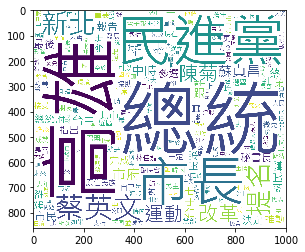

In [17]:
#把清洗後的不同文章中的文檔詞組加總作出近期熱門關鍵字
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(df_clean.sum(axis=0).to_dict())
plt.imshow(wordcloud)
plt.show()

In [18]:
#對標點符號以外詞組做TF-IDF
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(df_clean.values)  
df_tfidf = pd.DataFrame(tfidf.toarray(), columns = df_clean.columns.tolist())

In [19]:
#輸出第page篇本文，並以Threshold作為篩選閾值，輸出用於製作word cloud之Dictionary
def forWC(df_tfidf,page,threshold):
    return df_tfidf[page-1:page][df_tfidf[page-1:page]>threshold].dropna(axis=1).to_dict(orient='records')[0]

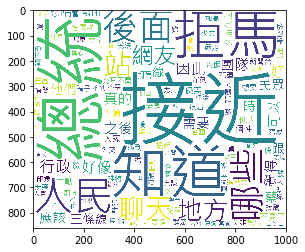

In [20]:
#第一篇文本
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(forWC(df_tfidf,1,0.05))
plt.imshow(wordcloud)
plt.show()

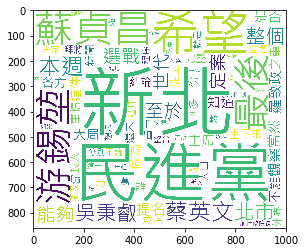

In [21]:
#第二篇文本
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(forWC(df_tfidf,2,0.05))
plt.imshow(wordcloud)
plt.show()

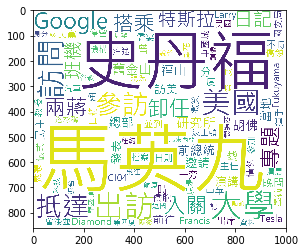

In [22]:
#第三篇文本
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(forWC(df_tfidf,3,0.05))
plt.imshow(wordcloud)
plt.show()

# 自由時報近期30篇新聞分析

In [23]:
res = requests.get('http://news.ltn.com.tw/list/breakingnews/politics')
#確定可以讀取到網頁
res.status_code

200

In [24]:
soup2 = BeautifulSoup(res.text, 'html.parser')
#每一篇文章
soup2.find('ul',class_='imm').find_all('li')[0]
#每一篇文章的網址
soup2.find('ul',class_='imm').find_all('li')[0].find('a',class_='tit')['href']
url_list2 = []
for s in soup2.find('ul',class_='imm').find_all('li'):
    url_list2.append(s.find('a',class_='tit')['href'])

In [25]:
article_list2 = []
for url in url_list2:
    soup_temp = BeautifulSoup(requests.get(url).text, 'html.parser')
    p_temp = ''
    for p in soup_temp.find('div',class_='text').find_all('p'):
        p_temp = p_temp+p.text
    article_list2.append(p_temp)

In [26]:
# t2 為「儲存每一篇文章中的每一句話的list」的list， ttolines為儲存文章中每一句話的list
t2 = []
for article in article_list2:
    ttolines2 = []
    for line in article.split('，'):
        ttolines2.append(line)
    t2.append(ttolines2)

In [27]:
div_vector2 = {}
div_vector2 = text_cut(t2[0],div_vector2)
df2 = pd.DataFrame(div_vector2,index = [0])
#把每一篇文章中的句子切成詞組並存進DataFrame裡
for i in range(1,len(t2)):
    div_vector2 = {}
    div_vector2 = text_cut(t2[i],div_vector2)
    temp_df = pd.DataFrame(div_vector2,index=[0])
    #把不同篇文章的詞組以columns連接起來
    df2 = pd.concat([df2,temp_df],ignore_index=True)
#把缺失值用0替代
df2 = df2.fillna(0)

In [28]:
#Remove stop word
stopword2 = ['你','我','他','的','也','有','在','與','不','一','年','月','日','人','讓','為','都','天','是','說','會','但','要','她','對','了','就','做','很','及','等','表示','意見','新','將','沒有','努力','預計','一個','而','這是','別人','必須','大家','過','這','於','後','這次','因為','又','向','只是','但是','認為','今天','能夠','可以','新聞','被','對於','到','市','上','和']
punc2 = [' ','！','（','）','〔','〕','：','；','？','。','「','」','、','《','》','／']
politics_stop2 = ['台灣']
numbers2 = df2.columns[0:37].tolist() #透過直接觀察columns得知(應可替換成用程式判斷)
df2_clean = df2.drop(stopword2+punc2+politics_stop2+numbers2,axis=1)

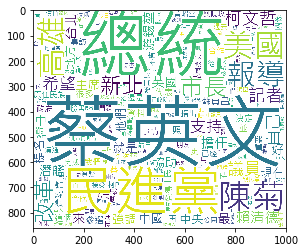

In [29]:
#把清洗後的不同文章中的文檔詞組加總作出近期熱門關鍵字
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(df2_clean.sum(axis=0).to_dict())
plt.imshow(wordcloud)
plt.show()

In [30]:
tfidf2 = transformer.fit_transform(df2_clean.values)  
df_tfidf2 = pd.DataFrame(tfidf2.toarray(), columns = df2_clean.columns.tolist())

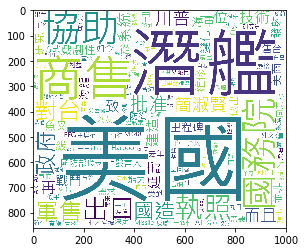

In [31]:
#第一篇文本
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(forWC(df_tfidf2,1,0.03))
plt.imshow(wordcloud)
plt.show()

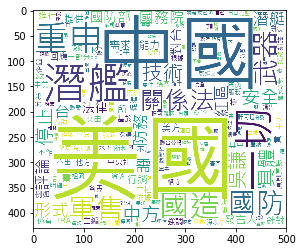

In [32]:
#第二篇文本
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=500, height=430, margin=2)
wordcloud.fit_words(forWC(df_tfidf2,2,0.03))
plt.imshow(wordcloud)
plt.show()

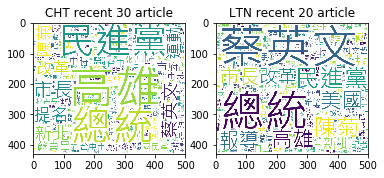

In [33]:
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=500, height=430, margin=2)
wordcloud.fit_words(df_clean.sum(axis=0).to_dict())
plt.subplot(121)
plt.title("CHT recent 30 article")
plt.imshow(wordcloud)
wordcloud.fit_words(df2_clean.sum(axis=0).to_dict())
plt.subplot(122)
plt.title("LTN recent 20 article")
plt.imshow(wordcloud)
plt.show()

# 預計想觀察政治風格較為鮮明(?)的兩大黨報(?)最近在政治版上在聊些什麼

## 在看中國時報的文字雲時，最突出的是「高雄」以及「總統」兩個關鍵詞，另外還有許多政治人物的名字以及「民進黨」，我本來想說是不是都是在罵民進黨呢(?)。但是後來做了自由時報的文字雲發現關鍵字其實也是「總統」和「民進黨」我才發現原來是因為執政黨的關係，國民黨的聲勢目前是比較小的。另外在自由時報看到了「美國」這個關鍵字，後來觀察幾篇單篇文章後發現是跟軍售案有關。